<html><div style="font-size:7pt">This notebook may contain text, code and images generated by artificial intelligence. Used model: claude-3-5-sonnet-20241022, vision model: claude-3-5-sonnet-20241022, endpoint: None, bia-bob version: 0.25.2.. It is good scientific practice to check the code and results it produces carefully. <a href="https://github.com/haesleinhuepf/bia-bob">Read more about code generation using bia-bob</a></div></html>

# Type Statistics Analysis

This notebook analyzes the distribution of different types in the resources dataset.

In [1]:
import sys
sys.path.append("../scripts/")
import pandas as pd
from generate_link_lists import all_content
import numpy as np
import matplotlib.pyplot as plt

## Load and inspect the data
First, let's load the data and look at the first few entries to understand its structure.

In [2]:
data = all_content("../resources/")
print("First 3 entries in the resources:")
data["resources"][:3]

First 3 entries in the resources:


[{'authors': ['Elisabeth Kugler'],
  'name': 'Sharing Your Poster on Figshare: A Community Guide to How-To and Why',
  'proficiency_level': 'novice',
  'tags': ['Sharing', 'Research Data Management', 'include in DALIA'],
  'type': ['Blog Post'],
  'url': 'https://focalplane.biologists.com/2023/07/26/sharing-your-poster-on-figshare/',
  'uuid': '63067620-fda2-407d-97f4-2f7c78bd5f9c'},
 {'authors': ['Marcelo Zoccoler'],
  'license': 'CC-BY-4.0',
  'name': 'Running Deep-Learning Scripts in the BiA-PoL Omero Server',
  'proficiency_level': 'proficient',
  'tags': ['Python',
   'Artificial Intelligence',
   'Bioimage Analysis',
   'include in DALIA'],
  'type': ['Blog Post'],
  'url': 'https://biapol.github.io/blog/marcelo_zoccoler/omero_scripts/readme.html',
  'uuid': '9d158030-2d9c-41f5-b119-2878a9186e60'},
 {'authors': ['Robert Haase'],
  'license': 'CC-BY-4.0',
  'name': 'Browsing the Open Microscopy Image Data Resource with Python',
  'proficiency_level': 'competent',
  'tags': ['OMERO

## Extract types from resources
Extract all types from the resources, handling cases where type might be missing.

In [3]:
types = []
for d in data["resources"]:
    if "type" in d.keys() and d["type"] is not None:
        if isinstance(d["type"], str):
            d["type"] = [d["type"]]
        types.extend(d["type"])
len(types)


740

## Analyze unique types
Let's see how many unique types we have in our dataset.

In [4]:
unique_types = np.unique(types)
print(f"Total types: {len(types)}")
print(f"Unique types: {len(unique_types)}")
print("\nList of unique types:")
print(unique_types)

Total types: 740
Unique types: 42

List of unique types:
['Application' 'Atlas' 'Blog Post' 'Blog post' 'Book' 'Code' 'Collection'
 'Conference Abstract' 'Data' 'Document' 'Documentation' 'Event'
 'Forum Post' 'Framework' 'GitHub Repository' 'GitLab Repository'
 'Github Repository' 'Github repository' 'Notebook' 'Online Course'
 'Online Tutorial' 'Poster' 'Preprint' 'Presentation' 'Publication'
 'Report' 'Slides' 'Software' 'Tool' 'Tutorial' 'Video' 'Webinar'
 'Website' 'Wiki' 'Workflow' 'Worksheet' 'Workshop' 'YouTube Channel'
 'collection' 'notebook' 'notebooks' 'publication']


## Visualize type distribution
Create a pie chart to visualize the distribution of different types in the resources.

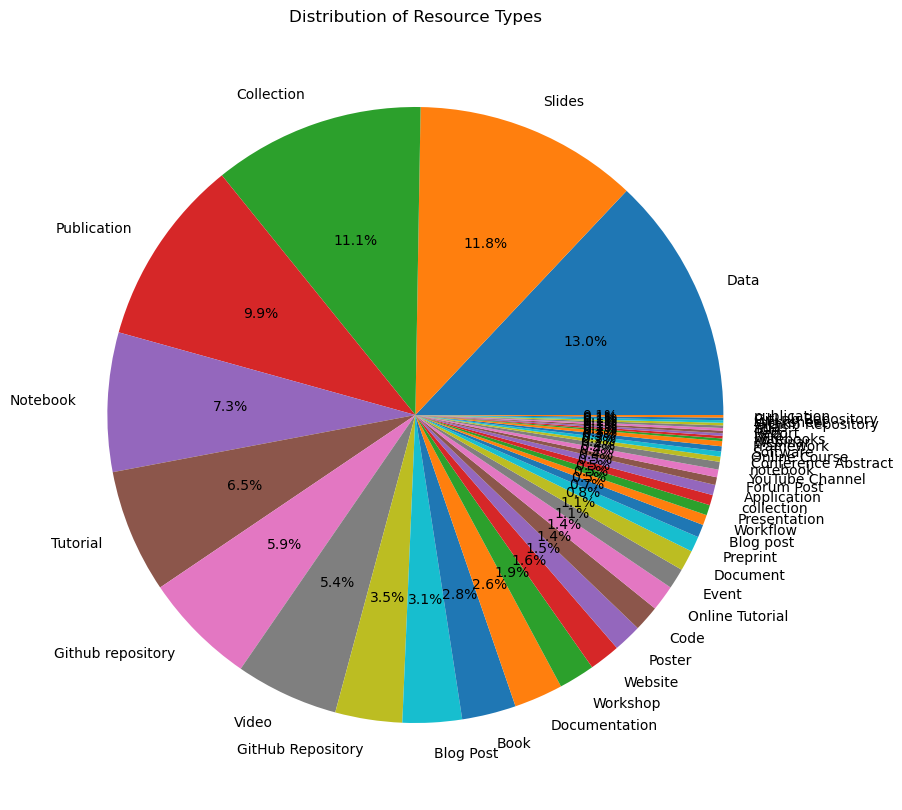


Detailed type counts:
Data                   96
Slides                 87
Collection             82
Publication            73
Notebook               54
Tutorial               48
Github repository      44
Video                  40
GitHub Repository      26
Blog Post              23
Book                   21
Documentation          19
Workshop               14
Website                12
Poster                 11
Code                   10
Online Tutorial        10
Event                   8
Document                8
Preprint                6
Blog post               5
Workflow                4
Presentation            4
collection              4
Application             4
Forum Post              3
YouTube Channel         3
notebook                3
Conference Abstract     2
Online Course           2
Software                2
Framework               2
Webinar                 1
notebooks               1
Wiki                    1
Report                  1
Tool                    1
Atlas          

In [5]:
# Count type occurrences
type_counts = pd.Series(types).value_counts()

# Create pie chart
plt.figure(figsize=(10, 10))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Resource Types')
plt.show()

# Print the actual counts
print("\nDetailed type counts:")
print(type_counts)